<a href="https://colab.research.google.com/github/BatalovaEvgeniya/HSE_ML_2018-2019/blob/master/backprop_Batalova_15112020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm

In [90]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [91]:
def loss(t, y):
  return -np.mean(y*np.log(t) + (1-y)*np.log(1-t), keepdims=True).flatten()

def diff_loss(t, y, x):
  return np.mean((y - t), keepdims=True).flatten()

In [92]:
class Layer:
    def __init__(self, n_inp, n_out, lr=0.1):
        self.shape = (n_inp, n_out)
        self.lr = lr
        self.w = np.zeros(self.shape, dtype=np.float32)
        self.b = np.zeros((1, n_out), dtype=np.float32)
        self._clear_grads()

    def _clear_grads(self):
        self.inp = None
        self.activations = None
        self.d_sigma = None
        self.d_w = None
        self.d_b = None

    def __call__(self, x):
        if len(x.shape) == 1:
            x = x.reshape(1, -1)
        self.inp = x
        self.activations = sigmoid(x.dot(self.w) + self.b)
        return self.activations

    def backward(self, grad):
        self.d_sigma = self.activations * (1 - self.activations)
        self.d_w = self.grad_w(grad)
        self.d_b = self.grad_b(grad)
        return self.grad_x(grad)

    def grad_w(self, grad):
        return grad * self.inp.T * self.d_sigma

    def grad_b(self, grad):
        return grad * self.d_sigma

    def grad_x(self, grad):
        return self.w.dot(grad) * self.d_sigma

    def step(self):
        self.w -= self.d_w * self.lr
        self.b -= self.d_b * self.lr
        self._clear_grads()

    def predict(self, x):
      return sigmoid(x.dot(self.w) + self.b)



In [93]:
n_size = 100

x_1 = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], size=[n_size, 1])
y_1 = np.zeros(shape=(n_size, 1))
x_2 = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], size=[n_size, 1])
y_2 = np.ones(shape=(n_size, 1))

X, y_ = np.concatenate([x_1, x_2], axis=0), np.concatenate([y_1, y_2], axis = 0)
X = X.reshape((X.shape[0], X.shape[2]))

l1 = Layer(2, 1)
one_cnt, zero_cnt = 0, 0
for i in range(10000):
  y_train = np.random.randint(low=0, high=2) 
  if y_train == 1:
    one_cnt += 1
    X_train = np.random.multivariate_normal([-1, -1], [[1, 0], [0, 1]], size=1)
  else:
    zero_cnt += 1
    X_train = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], size=1)
  y = l1(X_train)
  d_y = diff_loss(y_train, y, X_train)
  l1.backward(d_y)
  l1.step()
  y_pred= l1.predict(X_train)

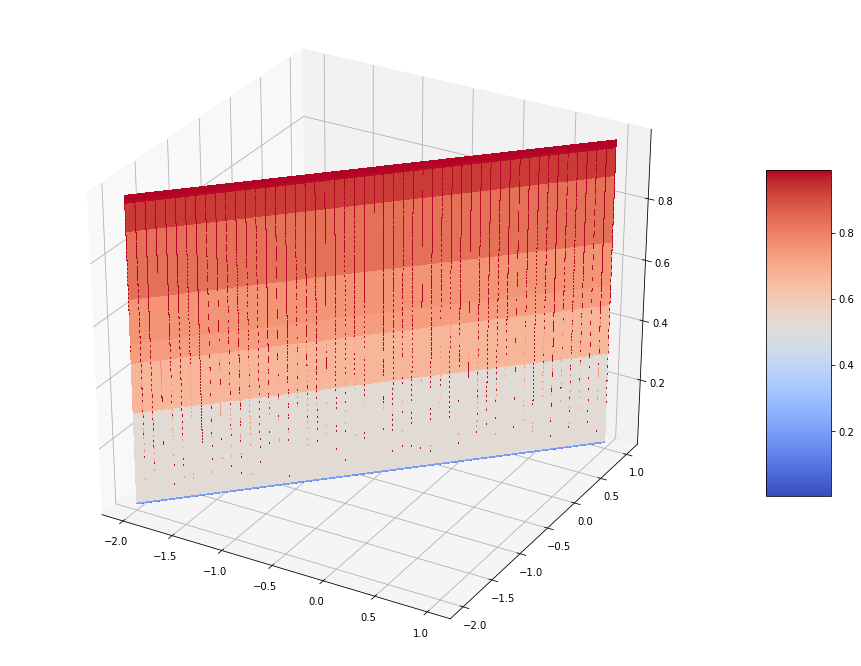

In [94]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

solution = l1.predict(X)
x_mesh, y_mesh = np.arange(-2, 1, 0.001), np.arange(-2, 1, 0.001)
surf = ax.plot_surface(x_mesh, y_mesh, solution, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()